<center><font color="#e30b5d"><h1>Question 8</h1></font></center>

In [ ]:
import sys              as sys
import numpy            as np
import keras            as keras

from matplotlib         import pyplot
from keras              import datasets, layers, models
from keras.datasets     import cifar10
from keras.utils        import to_categorical
from keras.models       import Sequential
from keras.layers       import Conv2D
from keras.layers       import MaxPooling2D
from keras.layers       import Dense
from keras.layers       import Flatten
from keras.optimizers   import SGD
from keras.layers       import Dense, Dropout, BatchNormalization

from sklearn.metrics    import classification_report

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY  = to_categorical(trainY)
testY   = to_categorical(testY)
# printing the shape of the train and test sets
print('Training data shape : ', trainX.shape, trainY.shape)
print('Testing data shape  : ', testX.shape , testY.shape )

Training data shape :  (50000, 32, 32, 3) (50000, 10)
Testing data shape  :  (10000, 32, 32, 3) (10000, 10)


<Figure size 640x480 with 0 Axes>

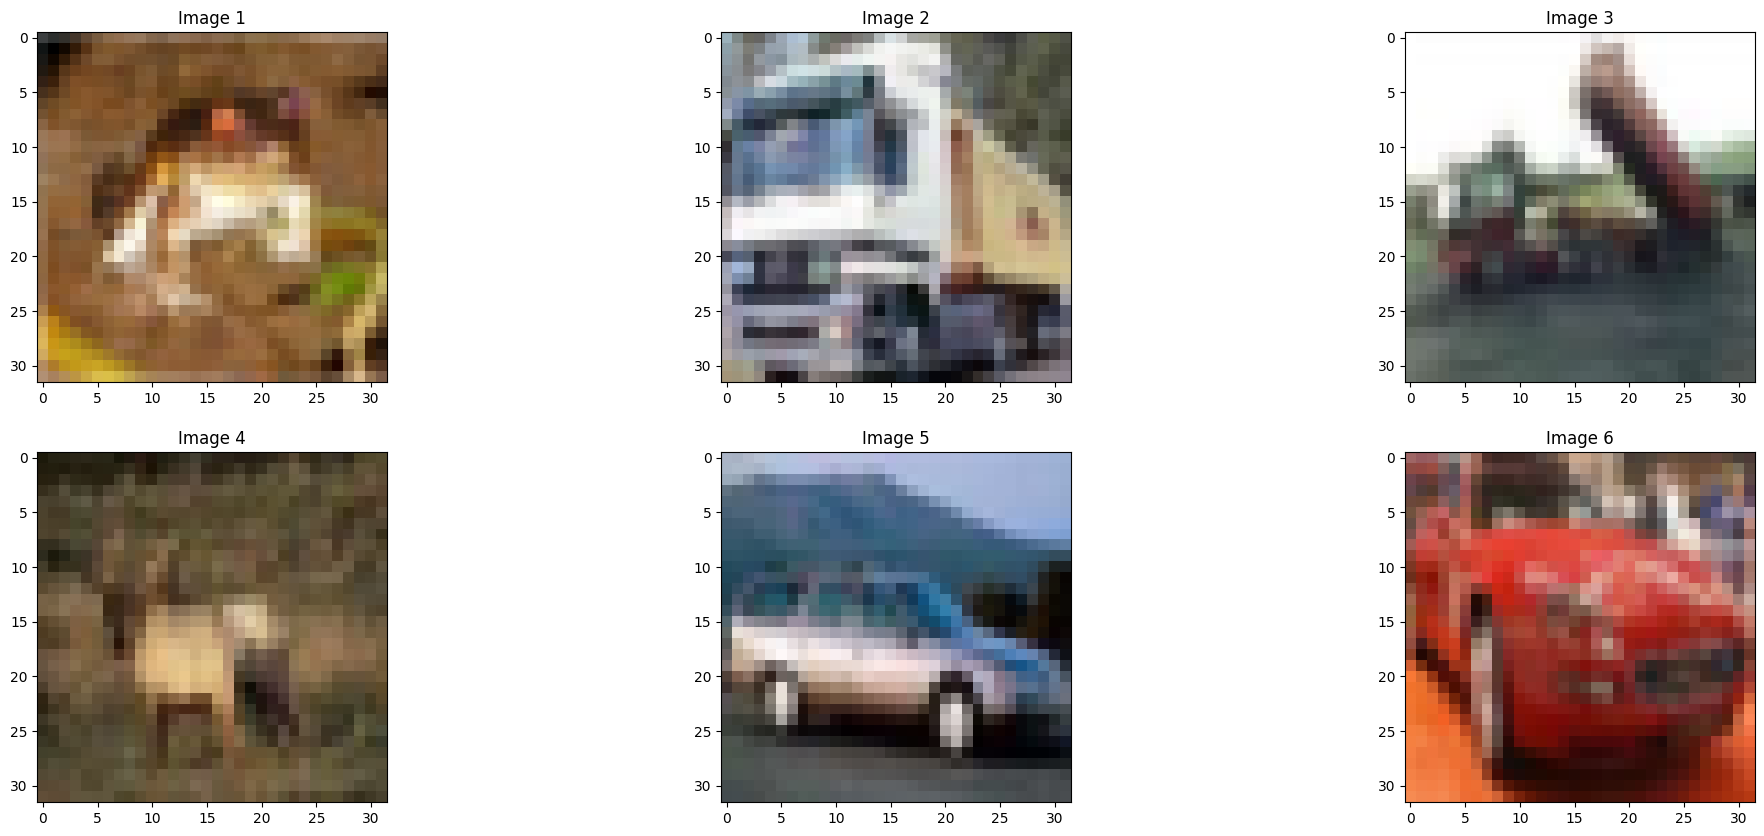

In [ ]:
pyplot.subplots_adjust(left=0.0625, right=0.95, wspace=0.5, hspace = 0.4)
pyplot.figure(figsize=(25, 10))

pyplot.subplot(231)
pyplot.imshow(trainX[0, :, :, :])
pyplot.title('Image 1')

pyplot.subplot(232)
pyplot.imshow(trainX[1, :, :, :])
pyplot.title('Image 2')

pyplot.subplot(233)
pyplot.imshow(trainX[2, :, :, :])
pyplot.title('Image 3')

pyplot.subplot(234)
pyplot.imshow(trainX[3, :, :, :])
pyplot.title('Image 4')

pyplot.subplot(235)
pyplot.imshow(trainX[4, :, :, :])
pyplot.title('Image 5')

pyplot.subplot(236)
pyplot.imshow(trainX[5, :, :, :])
pyplot.title('Image 6')

pyplot.show()

In [ ]:
# convert from integers to floats
train_norm  = trainX.astype('float32')
test_norm   = testX.astype('float32')
# normalize to range 0-1
train_norm  = train_norm / 255.0
test_norm   = test_norm / 255.0

In [ ]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Checking the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_22 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 32, 32, 32)      

In [ ]:
# Compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#fitting the model for the train data for 100 iterations and batch size of 64
history = model.fit(trainX, trainY, batch_size=64, epochs=20, validation_data=(testX, testY));

Epoch 1/20
782/782 [==============================] - 18s 17ms/step - loss: 1.5691 - accuracy: 0.4823 - val_loss: 1.1170 - val_accuracy: 0.6160
Epoch 2/20
782/782 [==============================] - 13s 16ms/step - loss: 0.9603 - accuracy: 0.6629 - val_loss: 1.0882 - val_accuracy: 0.6551
Epoch 3/20
782/782 [==============================] - 13s 16ms/step - loss: 0.8062 - accuracy: 0.7141 - val_loss: 0.7554 - val_accuracy: 0.7353
Epoch 4/20
782/782 [==============================] - 13s 16ms/step - loss: 0.7101 - accuracy: 0.7492 - val_loss: 0.6853 - val_accuracy: 0.7629
Epoch 5/20
782/782 [==============================] - 13s 16ms/step - loss: 0.6375 - accuracy: 0.7771 - val_loss: 0.6742 - val_accuracy: 0.7698
Epoch 6/20
782/782 [==============================] - 13s 16ms/step - loss: 0.5808 - accuracy: 0.7980 - val_loss: 0.6355 - val_accuracy: 0.7833
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 0.5262 - accuracy: 0.8177 - val_loss: 0.5758 - val_accuracy:

In [ ]:
#model Evaluation : calculating the accuracy
_, acc  = model.evaluate(testX, testY, verbose=0)
ypred   = model.predict(testX)

print("Accuracy = %.3f" % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step
Accuracy = 84.640


In [ ]:
%%capture
c = classification_report(testY.astype(int), ypred.astype(int));

In [ ]:
print(c)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      1000
           1       1.00      0.14      0.24      1000
           2       1.00      0.01      0.02      1000
           3       1.00      0.00      0.00      1000
           4       1.00      0.01      0.01      1000
           5       1.00      0.01      0.01      1000
           6       1.00      0.02      0.04      1000
           7       1.00      0.05      0.10      1000
           8       1.00      0.10      0.19      1000
           9       1.00      0.11      0.20      1000

   micro avg       1.00      0.05      0.09     10000
   macro avg       1.00      0.05      0.08     10000
weighted avg       1.00      0.05      0.08     10000
 samples avg       0.05      0.05      0.05     10000



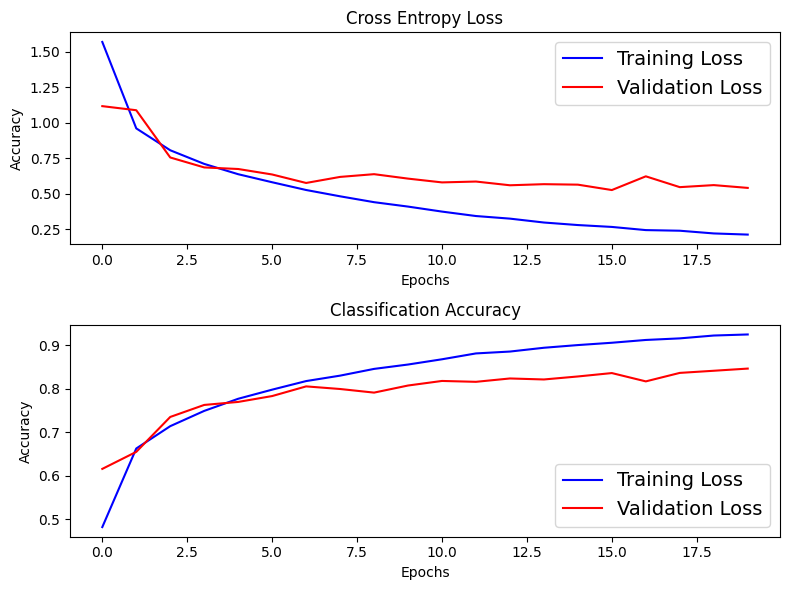

In [ ]:
pyplot.figure(figsize=[8,6])
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['loss'], color='b', label='train')
pyplot.plot(history.history['val_loss'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['accuracy'], color='b', label='train')
pyplot.plot(history.history['val_accuracy'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
pyplot.tight_layout()
pyplot.autoscale()
pyplot.show()
pyplot.close()

In [ ]:
# Compiling the model
model.compile(optimizer='SGD', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#fitting the model for the train data for 100 iterations and batch size of 64
history = model.fit(trainX, trainY, batch_size=64, epochs=20, validation_data=(testX, testY));

Epoch 1/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1086 - accuracy: 0.9618 - val_loss: 0.5180 - val_accuracy: 0.8594
Epoch 2/20
782/782 [==============================] - 13s 17ms/step - loss: 0.1085 - accuracy: 0.9617 - val_loss: 0.5443 - val_accuracy: 0.8522
Epoch 3/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1085 - accuracy: 0.9616 - val_loss: 1.1429 - val_accuracy: 0.6943
Epoch 4/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1091 - accuracy: 0.9614 - val_loss: 0.5285 - val_accuracy: 0.8581
Epoch 5/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1056 - accuracy: 0.9623 - val_loss: 0.5181 - val_accuracy: 0.8608
Epoch 6/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1031 - accuracy: 0.9637 - val_loss: 0.5163 - val_accuracy: 0.8601
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1042 - accuracy: 0.9620 - val_loss: 0.6731 - val_accuracy:

In [ ]:
#model Evaluation : calculating the accuracy
_, acc  = model.evaluate(testX, testY, verbose=0)
ypred   = model.predict(testX)

print("Accuracy = %.3f" % (acc * 100.0))

313/313 [==============================] - 1s 2ms/step
Accuracy = 85.980


In [ ]:
%%capture
c = classification_report(testY.astype(int), ypred.astype(int));

In [ ]:
print(c)

              precision    recall  f1-score   support

           0       1.00      0.02      0.05      1000
           1       1.00      0.26      0.41      1000
           2       1.00      0.03      0.06      1000
           3       1.00      0.01      0.02      1000
           4       1.00      0.03      0.05      1000
           5       1.00      0.04      0.08      1000
           6       1.00      0.13      0.23      1000
           7       1.00      0.10      0.18      1000
           8       1.00      0.17      0.29      1000
           9       1.00      0.16      0.27      1000

   micro avg       1.00      0.09      0.17     10000
   macro avg       1.00      0.09      0.16     10000
weighted avg       1.00      0.09      0.16     10000
 samples avg       0.09      0.09      0.09     10000



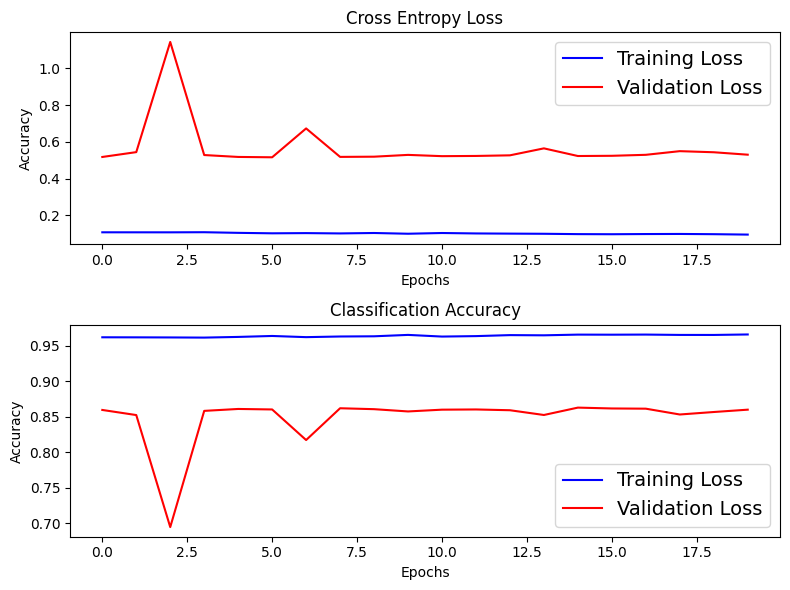

In [ ]:
pyplot.figure(figsize=[8,6])
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['loss'], color='b', label='train')
pyplot.plot(history.history['val_loss'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['accuracy'], color='b', label='train')
pyplot.plot(history.history['val_accuracy'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
pyplot.tight_layout()
pyplot.autoscale()
pyplot.show()
pyplot.close()

In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#fitting the model for the train data for 100 iterations and batch size of 64
history = model.fit(trainX, trainY, batch_size=64, epochs=20, validation_data=(testX, testY))

Epoch 1/20
782/782 [==============================] - 17s 16ms/step - loss: 0.1621 - accuracy: 0.9421 - val_loss: 0.6720 - val_accuracy: 0.8304
Epoch 2/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1756 - accuracy: 0.9379 - val_loss: 0.6962 - val_accuracy: 0.8291
Epoch 3/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1733 - accuracy: 0.9392 - val_loss: 0.6079 - val_accuracy: 0.8449
Epoch 4/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1751 - accuracy: 0.9396 - val_loss: 0.6778 - val_accuracy: 0.8320
Epoch 5/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1678 - accuracy: 0.9415 - val_loss: 0.6738 - val_accuracy: 0.8374
Epoch 6/20
782/782 [==============================] - 12s 16ms/step - loss: 0.1650 - accuracy: 0.9419 - val_loss: 0.6341 - val_accuracy: 0.8428
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 0.1607 - accuracy: 0.9432 - val_loss: 0.6476 - val_accuracy:

In [ ]:
#model Evaluation : calculating the accuracy
_, acc  = model.evaluate(testX, testY, verbose=0)
ypred   = model.predict(testX)

print("Accuracy = %.3f" % (acc * 100.0))

313/313 [==============================] - 1s 2ms/step
Accuracy = 84.390


In [ ]:
%%capture
c = classification_report(testY.astype(int), ypred.astype(int));

In [ ]:
print(c)

              precision    recall  f1-score   support

           0       0.99      0.09      0.16      1000
           1       1.00      0.45      0.62      1000
           2       1.00      0.09      0.16      1000
           3       0.97      0.03      0.06      1000
           4       1.00      0.07      0.13      1000
           5       0.99      0.09      0.16      1000
           6       0.99      0.13      0.23      1000
           7       1.00      0.26      0.41      1000
           8       1.00      0.22      0.36      1000
           9       1.00      0.31      0.48      1000

   micro avg       1.00      0.17      0.30     10000
   macro avg       0.99      0.17      0.28     10000
weighted avg       0.99      0.17      0.28     10000
 samples avg       0.17      0.17      0.17     10000



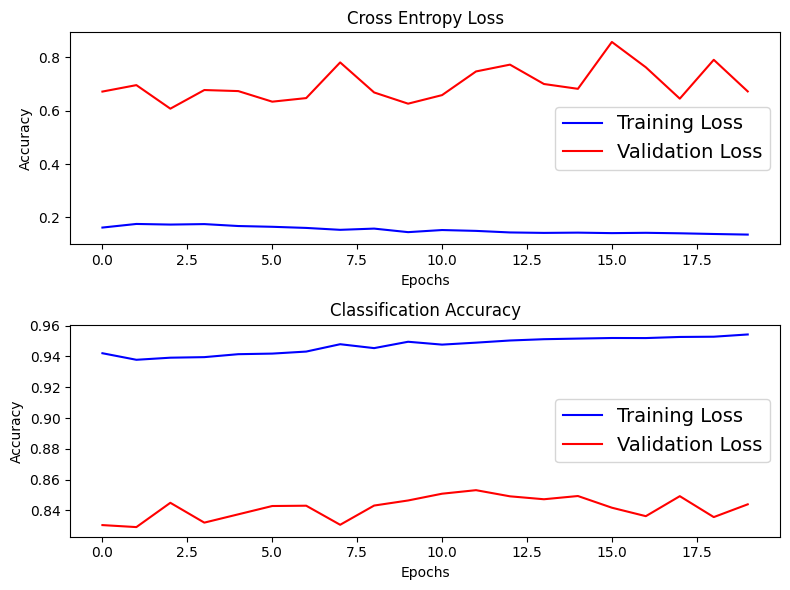

In [ ]:
pyplot.figure(figsize=[8,6])
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['loss'], color='b', label='train')
pyplot.plot(history.history['val_loss'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.xlabel('Epochs', fontsize=10)
pyplot.ylabel('Accuracy', fontsize=10)
pyplot.plot(history.history['accuracy'], color='b', label='train')
pyplot.plot(history.history['val_accuracy'], color='r', label='test')
pyplot.legend(['Training Loss', 'Validation Loss'], fontsize=14)
pyplot.tight_layout()
pyplot.autoscale()
pyplot.show()
pyplot.close()